In [1]:
import pandas as pd
import seaborn as sb
pd.set_option('display.max_columns', None)
from scipy.stats import zscore
from sklearn.cluster import KMeans

In [2]:
trainDF = pd.read_csv('../outputs/train.csv')

In [3]:
trainDF = trainDF.dropna()

In [4]:
# Finalizing Indexes so we can drop state names 
trainDF = trainDF.reset_index(drop=True)
featureColumns = trainDF.columns.to_list()

In [5]:
featureColumns.remove('stateName')
featureColumns.remove('CEN_stateCode')
featureColumns.remove('Unnamed: 0')
featureColumns.remove('CEN_Unnamed: 0')
featureColumns.remove('CEN_Unnamed: 0.1')

In [6]:
stateDF = trainDF[['stateName','CEN_stateCode']]
featureDF = trainDF[featureColumns]

In [7]:
featureDF.head()

,CEN_Bachelor's Degree or Higher,CEN_Employment Rate,CEN_Hispanic or Latino (of any race),CEN_Median Household Income,CEN_Total Employer Establishments,CEN_Total Households,CEN_Total Housing Units,CEN_Total Population,CEN_Without Health Care Coverage,CP_0_diff,CP_1_diff,CP_2_diff,FD_adminAndFireResponse,FD_fireResponseOnly,FD_lessThan10kCitizens,FD_moreThan10kCitizens,FD_totalFireDepartments,HB_bed_For-Profit,HB_bed_Non-Profit,HB_bed_State/Local Government,HB_bed_Total,OB_Prevalence,S1_people_fully_vaccinated,S1_people_fully_vaccinated_per_hundred,S1_people_vaccinated,S1_people_vaccinated_per_hundred,S2_people_fully_vaccinated,S2_people_fully_vaccinated_per_hundred,S2_people_vaccinated,S2_people_vaccinated_per_hundred,S3_people_fully_vaccinated,S3_people_fully_vaccinated_per_hundred,S3_people_vaccinated,S3_people_vaccinated_per_hundred,S4_people_fully_vaccinated,S4_people_fully_vaccinated_per_hundred,S4_people_vaccinated,S4_people_vaccinated_per_hundred,SP_Governor Political Affiliation,SP_State Attorney General Political Affiliation,SP_State House Majority Political Affiliation,SP_State Senate Majority Political Affiliation
0,26.3,54.7,264047.0,51734.0,100731.0,1897576.0,2288330.0,5024279.0,9.7,222,387,625,783,20,803,87,890,0.87,0.81,1.42,3.11,39.0,111036.0,2.26,431259.0,8.80,1273999.0,25.98,1658191.0,33.82,1748529.0,35.66,2295863.0,46.82,2237829.0,45.64,2731073.0,55.70,0,0,0,0
1,30.2,59.3,49824.0,75463.0,21399.0,252199.0,326200.0,733391.0,12.2,230,353,655,181,0,181,8,189,0.36,1.55,0.29,2.20,31.9,62474.0,8.54,130751.0,17.87,279464.0,38.20,325229.0,44.46,339304.0,46.38,387173.0,52.93,393678.0,53.81,451692.0,61.74,0,0,0,0
2,30.2,56.8,2192253.0,62055.0,147163.0,2670441.0,3082000.0,7151502.0,11.3,206,393,624,151,2,153,65,218,0.47,1.36,0.11,1.93,30.9,161324.0,2.22,678697.0,9.32,2554973.0,35.10,3297376.0,45.30,3385335.0,46.51,4010968.0,55.11,3888617.0,53.42,4484322.0,61.61,0,0,0,0
3,23.3,55.2,256847.0,48952.0,67243.0,1163647.0,1365265.0,3011524.0,9.1,227,391,610,672,20,692,56,748,0.63,2.14,0.26,3.03,36.4,152675.0,5.06,364735.0,12.09,859154.0,28.47,1119545.0,37.10,1147261.0,38.02,1505180.0,49.88,1480182.0,49.05,1809546.0,59.96,0,0,0,0
4,35.0,60.3,15579652.0,80440.0,966224.0,13157873.0,14392140.0,39538223.0,7.7,220,387,620,410,74,484,311,795,0.32,1.21,0.33,1.85,30.3,1507829.0,3.82,4766592.0,12.06,15287883.0,38.69,21092951.0,53.38,21559379.0,54.56,26629017.0,67.39,24374216.0,61.69,29685821.0,75.13,1,1,1,1


In [8]:
featureDF_zscore = featureDF.apply(zscore)

In [9]:
featureDF_zscore.head()

,CEN_Bachelor's Degree or Higher,CEN_Employment Rate,CEN_Hispanic or Latino (of any race),CEN_Median Household Income,CEN_Total Employer Establishments,CEN_Total Households,CEN_Total Housing Units,CEN_Total Population,CEN_Without Health Care Coverage,CP_0_diff,CP_1_diff,CP_2_diff,FD_adminAndFireResponse,FD_fireResponseOnly,FD_lessThan10kCitizens,FD_moreThan10kCitizens,FD_totalFireDepartments,HB_bed_For-Profit,HB_bed_Non-Profit,HB_bed_State/Local Government,HB_bed_Total,OB_Prevalence,S1_people_fully_vaccinated,S1_people_fully_vaccinated_per_hundred,S1_people_vaccinated,S1_people_vaccinated_per_hundred,S2_people_fully_vaccinated,S2_people_fully_vaccinated_per_hundred,S2_people_vaccinated,S2_people_vaccinated_per_hundred,S3_people_fully_vaccinated,S3_people_fully_vaccinated_per_hundred,S3_people_vaccinated,S3_people_vaccinated_per_hundred,S4_people_fully_vaccinated,S4_people_fully_vaccinated_per_hundred,S4_people_vaccinated,S4_people_vaccinated_per_hundred,SP_Governor Political Affiliation,SP_State Attorney General Political Affiliation,SP_State House Majority Political Affiliation,SP_State Senate Majority Political Affiliation
0,-0.968909,-1.511584,-0.333137,-1.227428,-0.269943,-0.151266,-0.110762,-0.155930,0.382415,0.521445,0.320806,-0.156856,1.193913,-0.261681,1.015975,-0.054692,0.854362,1.560424,-1.275739,2.238485,0.696981,1.707524,-0.425676,-1.256653,-0.293832,-1.144013,-0.353036,-1.789146,-0.335821,-1.555582,-0.346390,-1.642276,-0.283055,-1.191881,-0.297357,-1.412308,-0.267989,-1.097759,-0.902671,-0.940540,-0.696311,-0.707107
1,-0.374309,-0.334689,-0.411491,0.888699,-0.735549,-0.813891,-0.806225,-0.752224,1.191497,0.641472,-0.658063,0.505725,-0.700141,-0.489836,-0.756485,-0.999838,-0.847277,-0.068440,-0.364425,-0.166345,-0.536288,-0.052617,-0.574416,2.502799,-0.646165,2.840578,-0.724821,0.234475,-0.707521,-0.277603,-0.728166,-0.373442,-0.705687,-0.507419,-0.728310,-0.389516,-0.712397,-0.470867,-0.902671,-0.940540,-0.696311,-0.707107
2,-0.374309,-0.974306,0.372128,-0.307012,0.002571,0.159982,0.170549,0.139685,0.900227,0.281390,0.493547,-0.178942,-0.794530,-0.467021,-0.836274,-0.317897,-0.776882,0.282884,-0.598411,-0.549415,-0.902203,-0.300524,-0.271649,-1.280599,-0.003722,-0.915569,0.125828,-0.278882,0.121270,-0.176710,0.097040,-0.358055,0.096713,-0.263209,0.088409,-0.438339,0.073840,-0.484360,-0.902671,-0.940540,-0.696311,-0.707107
3,-1.426294,-1.383661,-0.335770,-1.475524,-0.466487,-0.446833,-0.437936,-0.435637,0.188235,0.596462,0.435967,-0.488146,0.844677,-0.261681,0.699667,-0.425572,0.509664,0.793900,0.362163,-0.230190,0.588562,1.062965,-0.298140,0.419536,-0.371829,0.301335,-0.508117,-1.376804,-0.486024,-1.161619,-0.509281,-1.362944,-0.458132,-0.849090,-0.474409,-0.985414,-0.447658,-0.655613,-0.902671,-0.940540,-0.696311,-0.707107
4,0.357507,-0.078843,5.268731,1.332543,4.809711,4.383472,4.179347,4.640384,-0.264850,0.491438,0.320806,-0.267286,0.020354,0.354340,0.106948,2.625215,0.623754,-0.196194,-0.783137,-0.081218,-1.010623,-0.449269,3.852557,-0.322776,4.789152,0.288155,4.885745,0.315618,5.083617,0.793785,5.020603,0.594754,5.104922,1.112436,4.875612,0.596972,4.987348,0.918880,1.107823,1.063219,0.725324,0.942809


In [10]:
model = KMeans(8)

In [11]:
model.fit(featureDF_zscore)

KMeans()

<AxesSubplot:xlabel="CEN_Bachelor's Degree or Higher", ylabel='CEN_Employment Rate'>

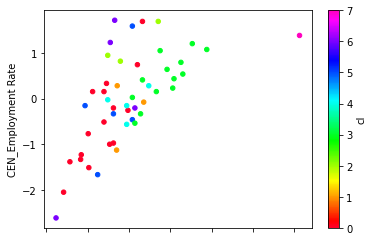

In [12]:
featureDF_zscore['cl'] = model.labels_

featureDF_zscore.plot.scatter("CEN_Bachelor's Degree or Higher", "CEN_Employment Rate", c='cl', colormap='gist_rainbow')

In [13]:
featureDF_zscore['stateName'] = stateDF['stateName']

In [14]:
for classAssignment in featureDF_zscore['cl'].unique():
    print(f'Class Assigned : {classAssignment}')
    stateInClass = featureDF_zscore[featureDF_zscore['cl']==classAssignment]['stateName'].unique()
    for state in stateInClass:
        print(state)
    print('\n')

Class Assigned : 0
Alabama
Arizona
Arkansas
Georgia
Idaho
Indiana
Kansas
Kentucky
Louisiana
Mississippi
Missouri
Oklahoma
South Carolina
Tennessee
Utah
Wyoming


Class Assigned : 5
Alaska
Delaware
Nebraska
Nevada
New Mexico


Class Assigned : 1
California
Florida
Texas


Class Assigned : 3
Colorado
Connecticut
Hawaii
Maine
Maryland
Massachusetts
New Hampshire
New Jersey
Oregon
Rhode Island
Vermont
Virginia
Washington


Class Assigned : 7
District of Columbia


Class Assigned : 4
Illinois
North Carolina
Ohio
Pennsylvania


Class Assigned : 2
Iowa
Minnesota
Wisconsin


Class Assigned : 6
Montana
North Dakota
South Dakota
West Virginia




> Above this is boilerplate 

# Hypothesis Testing 

hypo = asssumption 

to prove our hypo this notebook exists 

Hypo : __States with similar demographic() have similar covid experiences__.
Covid impacts people of same demographic similarly. 


KM1 = state profile (avg income, avg weight...)
KM2 = covid profile (peak1, vaccination s1....)

KM1 and KM2 have similar clusters thus hypothesis is somewhat true. 

## CONCLUSION 
- From 2 completely different datasets, we generate similar clusters. 





In [15]:
import pandas as pd
import seaborn as sb
pd.set_option('display.max_columns', None)
from scipy.stats import zscore
from sklearn.cluster import KMeans

In [16]:
trainDF = pd.read_csv('../outputs/train.csv')
trainDF = trainDF.dropna()

In [17]:
trainDF.columns

Index(['Unnamed: 0', 'stateName', 'CEN_stateCode',
       'CEN_Bachelor's Degree or Higher', 'CEN_Employment Rate',
       'CEN_Hispanic or Latino (of any race)', 'CEN_Median Household Income',
       'CEN_Total Employer Establishments', 'CEN_Total Households',
       'CEN_Total Housing Units', 'CEN_Total Population', 'CEN_Unnamed: 0',
       'CEN_Unnamed: 0.1', 'CEN_Without Health Care Coverage', 'CP_0_diff',
       'CP_1_diff', 'CP_2_diff', 'FD_adminAndFireResponse',
       'FD_fireResponseOnly', 'FD_lessThan10kCitizens',
       'FD_moreThan10kCitizens', 'FD_totalFireDepartments',
       'HB_bed_For-Profit', 'HB_bed_Non-Profit',
       'HB_bed_State/Local Government', 'HB_bed_Total', 'OB_Prevalence',
       'S1_people_fully_vaccinated', 'S1_people_fully_vaccinated_per_hundred',
       'S1_people_vaccinated', 'S1_people_vaccinated_per_hundred',
       'S2_people_fully_vaccinated', 'S2_people_fully_vaccinated_per_hundred',
       'S2_people_vaccinated', 'S2_people_vaccinated_per_hundre

In [18]:
# Finalizing Indexes so we can drop state names 
trainDF = trainDF.reset_index(drop=True)
featureColumns = trainDF.columns.to_list()

In [19]:
featureColumns.remove('stateName')
featureColumns.remove('CEN_stateCode')
featureColumns.remove('Unnamed: 0')
featureColumns.remove('CEN_Unnamed: 0')
featureColumns.remove('CEN_Unnamed: 0.1')

In [20]:
profileColumns = ["CEN_Bachelor's Degree or Higher",
 'CEN_Employment Rate',
 'CEN_Hispanic or Latino (of any race)',
 'CEN_Median Household Income',
 'CEN_Total Employer Establishments',
 'CEN_Total Households',
 'CEN_Total Housing Units',
 'CEN_Total Population',
 'CEN_Without Health Care Coverage',
 'FD_adminAndFireResponse',
 'FD_fireResponseOnly',
 'FD_lessThan10kCitizens',
 'FD_moreThan10kCitizens',
 'FD_totalFireDepartments',
 'HB_bed_For-Profit',
 'HB_bed_Non-Profit',
 'HB_bed_State/Local Government',
 'HB_bed_Total',
 'OB_Prevalence',
 'SP_Governor Political Affiliation',
 'SP_State Attorney General Political Affiliation',
 'SP_State House Majority Political Affiliation',
 'SP_State Senate Majority Political Affiliation']

covidColumns = [ 'CP_0_diff',
 'CP_1_diff',
 'CP_2_diff',
 'S1_people_fully_vaccinated',
 'S1_people_fully_vaccinated_per_hundred',
 'S1_people_vaccinated',
 'S1_people_vaccinated_per_hundred',
 'S2_people_fully_vaccinated',
 'S2_people_fully_vaccinated_per_hundred',
 'S2_people_vaccinated',
 'S2_people_vaccinated_per_hundred',
 'S3_people_fully_vaccinated',
 'S3_people_fully_vaccinated_per_hundred',
 'S3_people_vaccinated',
 'S3_people_vaccinated_per_hundred',
 'S4_people_fully_vaccinated',
 'S4_people_fully_vaccinated_per_hundred',
 'S4_people_vaccinated',
 'S4_people_vaccinated_per_hundred']

In [21]:
# Creating the 2 kmeans bunches
profileDF = trainDF[profileColumns]
covidDF = trainDF[covidColumns]

In [22]:
# Standardize 
profileDF = profileDF.apply(zscore)
covidDF = covidDF.apply(zscore)

In [23]:
K = 8
model = KMeans(K)
model2 = KMeans(K)


model.fit(profileDF)
model2.fit(profileDF)
profileDF['cl'] = model.labels_
covidDF['cl'] = model2.labels_

In [24]:
covidDF['stateName'] = stateDF['stateName']
profileDF['stateName'] = stateDF['stateName']

## State Profile

In [26]:
PROFILE = [] 
profile_component = [] 
for classAssignment in profileDF['cl'].unique():
    print(f'Class Assigned : {classAssignment}')
    stateInClass = profileDF[profileDF['cl']==classAssignment]['stateName'].unique()
    for state in stateInClass:
        print(state)
    print('\n')

Class Assigned : 0
Alabama
Arkansas
Georgia
Indiana
Iowa
Kansas
Kentucky
Louisiana
Mississippi
Missouri
Ohio
Oklahoma
South Carolina
Tennessee
West Virginia


Class Assigned : 5
Alaska
Arizona
Idaho
Nevada
New Hampshire
New Mexico
Utah
Wyoming


Class Assigned : 3
California


Class Assigned : 6
Colorado
Connecticut
Illinois
Maryland
Massachusetts
Minnesota
New Jersey
Oregon
Virginia
Washington
Wisconsin


Class Assigned : 1
Delaware
District of Columbia
Hawaii
Maine
Nebraska
Rhode Island
Vermont


Class Assigned : 4
Florida
Texas


Class Assigned : 7
Montana
North Dakota
South Dakota


Class Assigned : 2
North Carolina
Pennsylvania




## Covid Profile

In [27]:
for classAssignment in covidDF['cl'].unique():
    print(f'Class Assigned : {classAssignment}')
    stateInClass = covidDF[covidDF['cl']==classAssignment]['stateName'].unique()
    for state in stateInClass:
        print(state)
    print('\n')

Class Assigned : 1
Alabama
Arkansas
Georgia
Indiana
Iowa
Kansas
Kentucky
Louisiana
Mississippi
Missouri
Montana
North Dakota
Ohio
Oklahoma
South Dakota
Tennessee
West Virginia


Class Assigned : 4
Alaska
Arizona
Idaho
Nevada
New Hampshire
New Mexico
South Carolina
Utah
Wyoming


Class Assigned : 3
California


Class Assigned : 2
Colorado
Connecticut
Delaware
Hawaii
Maine
Maryland
Massachusetts
Nebraska
Oregon
Rhode Island
Vermont


Class Assigned : 7
District of Columbia


Class Assigned : 6
Florida
Texas


Class Assigned : 5
Illinois
Minnesota
New Jersey
Virginia
Washington
Wisconsin


Class Assigned : 0
North Carolina
Pennsylvania


